# Loading data in memory with the SCS ToolBox

## ToolBox mnemonics

Within the framework of the [extra_data](https://extra-data.readthedocs.io/en/latest/) package, which the SCS ToolBox is built upon, the European XFEL data is organized in a hierachical structure, in which a *source* (for instance, a motor, or the output of a digitizer) contains a few datasets, accessed with a *key* (the actual position of the motor, the various channels of the digitizer). The ToolBox *mnemonics* are simple words that represent frequently used variables at the SCS instrument. Each menmonic is associated with a dictionnary containing the source, the key and the dimension names of the variable.

The mnemonics are stored in a dictionnary, accessible as `toolbox_scs.mnemonics`. Let us read the content of the mnemonic `SCS_SA3`, which corresponds to the pulse energy of the SASE 3 pulses measured by the XGM in the SCS experiment hutch:

In [1]:
import toolbox_scs as tb
tb.mnemonics['SCS_XGM']

Cupy is not installed in this environment, no access to the GPU


({'source': 'SCS_BLU_XGM/XGM/DOOCS:output',
  'key': 'data.intensityTD',
  'dim': ['XGMbunchId']},)

The list of available mnemonics can vary from run to run, depending on which sources were recorded. The function `mnemonics_for_run` returns the mnemonics that correspond to actual data sources in a run. The input parameters can be the proposal and run numbers of the run or the run itself (`extra_data` `DataCollection`):

In [2]:
# providing the proposal and run numbers
run_mnemonics = tb.mnemonics_for_run(3485, 52)

# alternative, providing the DataCollection as input argument
run = tb.open_run(3485, 52)
run_mnemonics = tb.mnemonics_for_run(run)

In [3]:
run_mnemonics.keys()

dict_keys(['sase3', 'sase2', 'sase1', 'laser', 'maindump', 'bunchpattern', 'bunchPatternTable', 'npulses_sase3', 'npulses_sase1', 'npulses_laser', 'BAM414', 'BAM1932M', 'BAM1932S', 'nrj', 'nrj_target', 'mono_order', 'M2BEND', 'tpi', 'VSLIT', 'ESLIT', 'HSLIT', 'transmission', 'transmission_setpoint', 'transmission_col2', 'GATT_pressure', 'UND', 'UND2', 'UND3', 'XTD10_photonFlux', 'XTD10_photonFlux_sigma', 'XTD10_XGM', 'XTD10_XGM_sigma', 'XTD10_SA3', 'XTD10_SA3_sigma', 'XTD10_SA1', 'XTD10_SA1_sigma', 'XTD10_slowTrain', 'XTD10_slowTrain_SA1', 'XTD10_slowTrain_SA3', 'SCS_photonFlux', 'SCS_photonFlux_sigma', 'SCS_HAMP_HV', 'SCS_XGM', 'SCS_XGM_sigma', 'SCS_SA1', 'SCS_SA1_sigma', 'SCS_SA3', 'SCS_SA3_sigma', 'SCS_slowTrain', 'SCS_slowTrain_SA1', 'SCS_slowTrain_SA3', 'AFS_DelayLine', 'AFS_FocusLens', 'PP800_PhaseShifter', 'PP800_SynchDelayLine', 'PP800_DelayLine', 'PP800_HalfWP', 'PP800_FocusLens', 'FFT_FocusLens', 'hRIXS_det', 'hRIXS_exposure', 'hRIXS_delay', 'hRIXS_index', 'hRIXS_norm', 'hRIX

<div class="alert alert-info">

The mnemonics are by no means an exhaustive list of the contents of a run, but rather convenience shortcuts to the mostly used data sources at SCS. Please refer to the [extra_data](https://extra-data.readthedocs.io/en/latest/) package to access the full list of data sources present in a run.

</div>

It is possible to extract the "run value" (see EXtra-Data [get_run_value()](https://extra-data.readthedocs.io/en/latest/reading_files.html#extra_data.DataCollection.get_run_value) for details) of a source/key combination by using the function `load_run_values()`.

This is a convenient way of quickly checking the values of the most relevant parameters of a run, like the opening of the exit slit of the monochromator ('ESLIT' im mm) or the transmission of the gas attenuator ('transmission' in %) without loading the full data, which would take much more time and require large memory.

The run value is indeed only one value. This means that the variables that have more than one values like digitizer or 2D detectors do not have a run value. The corresponding mnemonics get a run value of `None`, as in the following example:

In [4]:
run_values = tb.load_run_values(run)
run_values

{'sase3': array([612, 616, 620, ...,   1,   1,   1], dtype=int32),
 'sase2': array([150,   0,   0, ...,   0,   0,   0], dtype=int32),
 'sase1': array([610, 674, 738, ...,   1,   1,   1], dtype=int32),
 'laser': array([ 0, 40, 80, ...,  0,  0,  0], dtype=int32),
 'maindump': array([0, 2, 4, ..., 1, 1, 1], dtype=int32),
 'bunchpattern': 1,
 'bunchPatternTable': None,
 'npulses_sase3': 500,
 'npulses_sase1': 30,
 'npulses_laser': 22,
 'BAM414': None,
 'BAM1932M': None,
 'BAM1932S': None,
 'nrj': 927.9717888233587,
 'nrj_target': 928.0,
 'mono_order': 1,
 'M2BEND': 116.0004793503568,
 'tpi': 1,
 'VSLIT': 2.148199999999999,
 'ESLIT': 0.10432264111327783,
 'HSLIT': 31.00000573730469,
 'transmission': 1.1666694088238525,
 'transmission_setpoint': 2.0,
 'transmission_col2': 2.3306329751092547,
 'GATT_pressure': 0.6412954330444336,
 'UND': 0.9271398,
 'UND2': 0.5390185,
 'UND3': 0.9,
 'XTD10_photonFlux': 1561.6473,
 'XTD10_photonFlux_sigma': 71.602005,
 'XTD10_XGM': None,
 'XTD10_XGM_sigma': No

<div class="alert alert-info">

The run value of a source/key combination is stored at the beginning of the run. **The run value DOES NOT show nor it checks the variations of a variable in a run** and can only be representative if the value has not changed. The full check can be done with EXtra-Data [as_single_value()](https://extra-data.readthedocs.io/en/latest/reading_files.html#extra_data.KeyData.as_single_value) function or using the `load` function described below.
</div>

## The `load` function

The `load` function of the ToolBox loads the variables recorded in a run into memory. Given a proposal number and a run number, the function in its simplest form takes a list of mnemonics as the `fields` argument. The data associated to the mnemonics is loaded and all variables are aligned by train Id and pulse Id.

Example:

In [5]:
proposalNB = 2212
runNB = 208
fields = ['SCS_SA3', 'MCP3apd', 'nrj']
run, data = tb.load(proposalNB, runNB, fields)
run_mnemonics = tb.mnemonics_for_run(run)
data

<xarray.Dataset>
Dimensions:            (pulse_slot: 2700, sa3_pId: 125, trainId: 3066)
Coordinates:
  * trainId            (trainId) uint64 520069541 520069542 ... 520072606
  * sa3_pId            (sa3_pId) int64 1040 1048 1056 1064 ... 2016 2024 2032
Dimensions without coordinates: pulse_slot
Data variables:
    nrj                (trainId) float64 778.6 778.6 778.5 ... 783.4 783.4 783.4
    MCP3peaks          (trainId, sa3_pId) float64 -197.7 -34.67 ... -1.213e+03
    bunchPatternTable  (trainId, pulse_slot) uint32 2139945 0 2129961 ... 0 0 0
    SCS_SA3            (trainId, sa3_pId) float32 2838.6826 ... 8069.3115
Attributes:
    runFolder:  /gpfs/exfel/exp/SCS/201901/p002212/raw/r0208

The function returns an `extra_data` `DataCollection` (run) and an `xarray` `Dataset` (data, which is displayed here in a summarized form). The DataCollection is the key element of the `extra_data` package and it is used in many functions of the ToolBox. It contains information on the run and enables data handling and loading (see the `extra_data` [documentation](https://extra-data.readthedocs.io/en/latest/) for details). The Dataset data is the main result of our loading operation. In it, we can find:

* Dimensions `pulse_slot`, `trainId`, `sa3_pId`
* Coordinates: `trainId` and `sa3_pId`: the train Id values and the SASE 3 pulse Id values.
* Data variables: The loaded data arrays. In this example, nrj is the monochromator energy, in eV, for each train. MCP3peaks is one of the MCPs of the TIM detector, SCS_SA3 is the pulse energy of the SASE 3 pulses measured by the XGM in the SCS hutch. The bunchPatternTable is loaded if the number of pulses has changed during the run. It is an array of 2700 values per train (the maximum number of pulses at 4.5 MHz provided by the machine) and contains information on how the pulses are distributed among SASE 1, 2, 3, and the various lasers at European XFEL. The `sa3_pId` coordinates are extracted from this table. 
* Attribute `runFolder`, the name of the folder that contains the raw files of the run. It can be accessed via: `data.attrs['runFolder']`.

The (maximum) number of pulses per train is given by `data.sa3_pId.size`

## Accessing the raw arrays

The function `load`, by default, loads the raw arrays using the `get_array` function of `extra_data`, and extracts only the relevant data from them, according to the bunch pattern table. It may be required, in some cases, to access the raw array of a specific mnemonic. For this, we can use the `DataCollection` returned earlier by the call to `load`:

In [6]:
raw_traces = run.get_array(*run_mnemonics['MCP2raw'].values())
raw_traces

<xarray.DataArray 'SCS_UTC1_ADQ/ADC/1:network.digitizers.channel_1_C.raw.samples' (trainId: 3066, samplesId: 600000)>
array([[1515, 1500, 1507, ..., 1505, 1498, 1500],
       [1500, 1502, 1498, ..., 1504, 1490, 1499],
       [1503, 1508, 1507, ..., 1512, 1500, 1496],
       ...,
       [1502, 1515, 1517, ..., 1503, 1498, 1509],
       [1512, 1511, 1513, ..., 1506, 1504, 1506],
       [1499, 1502, 1508, ..., 1508, 1502, 1500]], dtype=int16)
Coordinates:
  * trainId  (trainId) uint64 520069541 520069542 ... 520072605 520072606
Dimensions without coordinates: samplesId

The `raw_traces` `DataArray` contains the digitizer raw traces generated by the MCP 2 of the TIM detector. The array has dimensions `trainId` and `samplesId` (the latter given by `tb.mnemonics['MCP2raw']['dim']`). Quick visual inspection of the trace of the first train can be performed using the built-in plotting function of `xarray`:

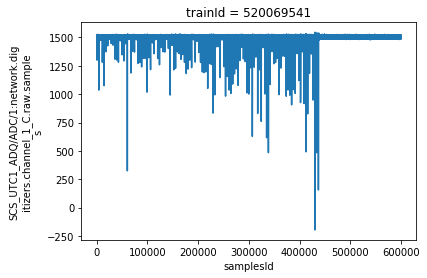

In [7]:
raw_traces.isel(trainId=0).plot()

## Missing trains

The data rate, or percentage of trains containing data, is checked in the `load` function, and a warning is displayed if less than 95% of data is present. This can be useful to identify DAQ problems during a beamtime.

In [8]:
fields = ['SCS_HAMP_HV', 'SCS_SA3']
run, ds = tb.load(5836, 162, fields)

SCS_SA3: only 85.6% of trains (2122 out of 2479) contain data.


A function `check_data_rate` allows to extract the fraction of trains containing data for given mnemonics:

In [9]:
tb.check_data_rate(run, fields)

{'SCS_HAMP_HV': 1.0, 'SCS_SA3': 0.8559903186768858}

It will return the data rate for all mnemonics in the run if `fields` is omitted

In [10]:
tb.check_data_rate(run)

{'sase3': 1.0,
 'sase2': 1.0,
 'sase1': 1.0,
 'laser': 1.0,
 'maindump': 1.0,
 'bunchpattern': 1.0,
 'bunchPatternTable': 1.0,
 'npulses_sase3': 1.0,
 'npulses_sase1': 1.0,
 'npulses_laser': 1.0,
 'BAM414': 0.9693424768051634,
 'BAM1932M': 0.982654296087132,
 'BAM1932S': 0.9669221460266236,
 'DPS2CAM2': 0.0,
 'XTD10_photonFlux': 1.0,
 'XTD10_photonFlux_sigma': 1.0,
 'XTD10_XGM': 0.9983864461476402,
 'XTD10_XGM_sigma': 0.9983864461476402,
 'XTD10_SA3': 0.9983864461476402,
 'XTD10_SA3_sigma': 0.9983864461476402,
 'XTD10_SA1': 0.9983864461476402,
 'XTD10_SA1_sigma': 0.9983864461476402,
 'XTD10_slowTrain': 1.0,
 'XTD10_slowTrain_SA1': 1.0,
 'XTD10_slowTrain_SA3': 1.0,
 'SCS_photonFlux': 1.0,
 'SCS_photonFlux_sigma': 1.0,
 'SCS_HAMP_HV': 1.0,
 'SCS_XGM': 0.8559903186768858,
 'SCS_XGM_sigma': 0.8559903186768858,
 'SCS_SA1': 0.8559903186768858,
 'SCS_SA1_sigma': 0.8559903186768858,
 'SCS_SA3': 0.8559903186768858,
 'SCS_SA3_sigma': 0.8559903186768858,
 'SCS_slowTrain': 1.0,
 'SCS_slowTrain_SA1

There is also an unreleased function from `extra_data`, called `plot_missing_trains()`, to be released in version 1.13.0 (see [here](https://extra-data.readthedocs.io/en/latest/reading_files.html#extra_data.DataCollection.plot_missing_data)) that should shows similar quantities.